<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
# Importing all the require libraries along with pandas
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


In [4]:
df.shape

(11398, 85)

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


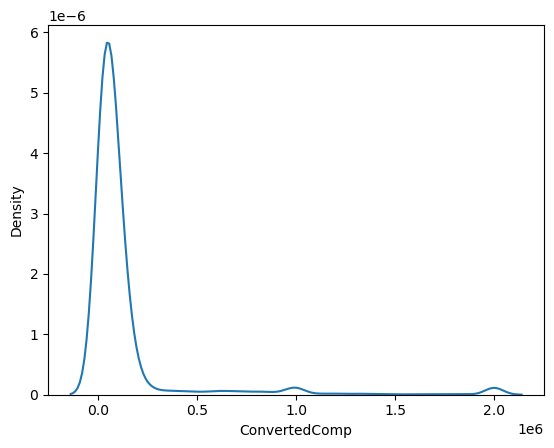

In [5]:
# your code goes here

sns.distplot(df['ConvertedComp'], 'ConvertedComp', hist = False, kde = True)
plt.show()

Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:ylabel='Frequency'>

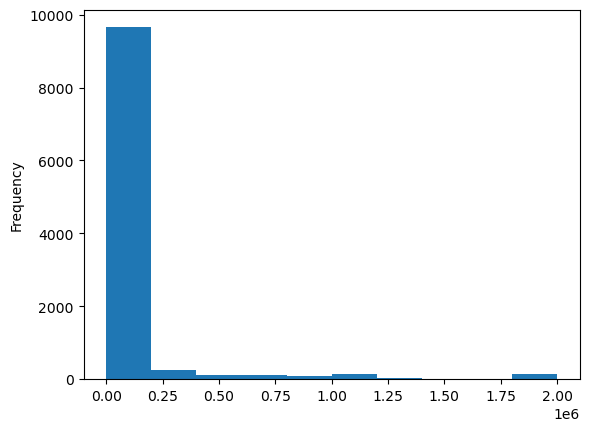

In [6]:
# your code goes here

df['ConvertedComp'].plot(kind = "hist")

What is the median of the column `ConvertedComp`?


In [7]:
# your code goes here

cc_median =df["ConvertedComp"].median()
print("median of Converted Comp column is :", cc_median)

median of Converted Comp column is : 57745.0


How many responders identified themselves only as a **Man**?


In [8]:
# your code goes here
df['Gender'].nunique()

7

In [9]:
man_count = df["Gender"] == "Man"
man_count.head()

0    True
1    True
2    True
3    True
4    True
Name: Gender, dtype: bool

In [10]:
only_man_count= man_count.value_counts()
only_man_count

True     10480
False      918
Name: Gender, dtype: int64

In [11]:
# another solutiion

only_man_value_count = (df['Gender'].tolist().count('Man'))
print("total only as a man count is : ", only_man_value_count)

total only as a man count is :  10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [12]:
# your code goes here
woman_count = df["Gender"] == "Woman"
woman_count.head()

0    False
1    False
2    False
3    False
4    False
Name: Gender, dtype: bool

In [13]:
only_woman_count = woman_count.value_counts()
only_woman_count

False    10667
True       731
Name: Gender, dtype: int64

In [14]:
owc_median = df[df['Gender'].eq('Woman')]['ConvertedComp'].median()
owc_median

57708.0

In [15]:
# another solution
only_woman_value_count = (df['Gender'].tolist().count('Woman'))
print("total only as a woman count is : ", only_woman_value_count)

total only as a woman count is :  731


In [16]:
# for confirmation of only man and woman valule count

df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [17]:
stats_summary = df['Age'].describe(include='all')
stats_summary

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

In [18]:
# your code goes here

five_number_summary = stats_summary.loc[['min', '25%', 'mean', '75%', 'max']]
print("the five number summary is as follows : \n \n", five_number_summary)

the five number summary is as follows : 
 
 min     16.000000
25%     25.000000
mean    30.778895
75%     35.000000
max     99.000000
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


This figure contains the histogram for the age coloumn 
 
 AxesSubplot(0.125,0.11;0.775x0.77)


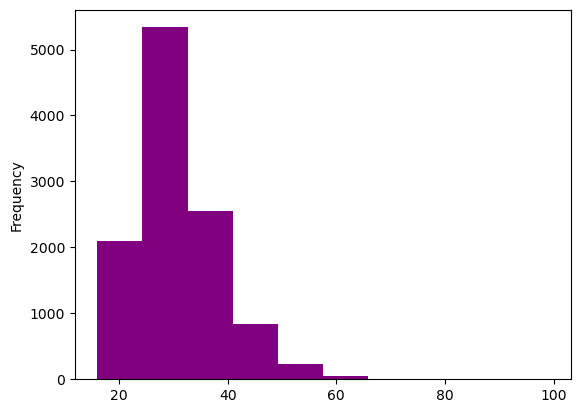

In [19]:
# your code goes here

age_hist = df['Age'].plot(kind='hist', color = 'purple', bins = 10)
print("This figure contains the histogram for the age coloumn \n \n", age_hist)

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


This figure show the boxplot analysing the outliers in ConvertedComp column 




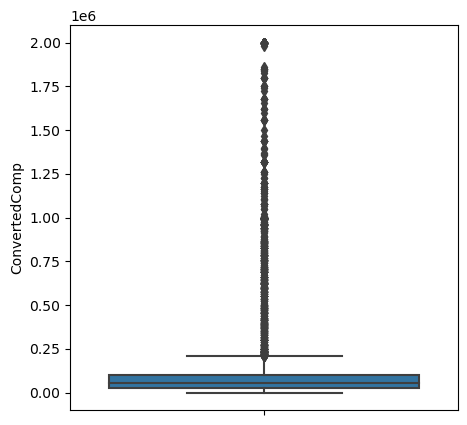

In [20]:
# your code goes here

plt.figure(figsize=(5,5))
cc_boxplot = sns.boxplot(y=df.ConvertedComp, data=df)
print("This figure show the boxplot analysing the outliers in ConvertedComp column \n\n")
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [21]:
# your code goes here

cc_stats_summary = df["ConvertedComp"].describe(include="all")
cc_stats_summary

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [22]:
cc_iqr = (cc_stats_summary.loc["75%"] - cc_stats_summary.loc["25%"])
print("The interquartile range of Converted Comp column is :", cc_iqr)

The interquartile range of Converted Comp column is : 73132.0


In [23]:
# another answer

cc_Q1 = df['ConvertedComp'].quantile(0.25)
cc_Q3 = df['ConvertedComp'].quantile(0.75)
cc_IQR = cc_Q3 - cc_Q1
print("The interquartile range of Converted Comp column is :", cc_IQR)

The interquartile range of Converted Comp column is : 73132.0


Find out the upper and lower bounds.


In [24]:
# your code goes here

cc_lower_bound = df['ConvertedComp'].min()
cc_upper_bound = df['ConvertedComp'].max()
print("The lower bound for ConvertedComp column is : ", cc_lower_bound)
print("The upper bound for ConvertedComp column is : ", cc_upper_bound)

The lower bound for ConvertedComp column is :  0.0
The upper bound for ConvertedComp column is :  2000000.0


Identify how many outliers are there in the `ConvertedComp` column.


In [25]:
# your code goes here

cc_below_outliers = df["ConvertedComp"].lt(cc_Q1 - 1.5*cc_IQR).sum()
cc_above_outliers = df["ConvertedComp"].gt(cc_Q3 + 1.5*cc_IQR).sum()
cc_median_outliers = df["ConvertedComp"].median()
cc_median_removed_outliers =  df[df["ConvertedComp"].le(cc_Q3 + 1.5*cc_IQR)]['ConvertedComp'].median()
cc_mean_removed_outliers = df[df["ConvertedComp"].le(cc_Q3 + 1.5*cc_IQR)]['ConvertedComp'].mean()

print("The outliers below in ConvertedComp Column are :", cc_below_outliers)
print("The outliers above in ConvertedComp Column are :", cc_above_outliers )
print("The outliers with median in ConvertedComp Column are :", cc_median_outliers)
print("The outliers removed with median in ConvertedComp Column are :", cc_median_removed_outliers)
print("The outliers removed with mean in ConvertedComp Column are :", cc_mean_removed_outliers)

The outliers below in ConvertedComp Column are : 0
The outliers above in ConvertedComp Column are : 879
The outliers with median in ConvertedComp Column are : 57745.0
The outliers removed with median in ConvertedComp Column are : 52704.0
The outliers removed with mean in ConvertedComp Column are : 59883.20838915799


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [26]:
# your code goes here

df_cc = df[~(df["ConvertedComp"] > (cc_Q3 + 1.5 * cc_IQR))]
df_cc.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [27]:
# your code goes here

df.corr()["Age"]

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

In [28]:
#Quiz Answers

In [29]:
sr_median_age = df['Age'].median()
print("The median age of survey respondent is :", sr_median_age)

The median age of survey respondent is : 29.0


In [30]:
owc_median = df[df['Gender'].eq('Woman')]['ConvertedComp'].median()
owc_median

57708.0

In [31]:
df_cc["ConvertedComp"].median()

52704.0

In [32]:
df_cc["ConvertedComp"].mean()

59883.20838915799

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
